In [1]:
# packages we will use throughout the entire section
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

# Introduction

Written by Skyler Wu '24

In CS181, we emphasize building machine learning models from scratch to fully understand how these models work under-the-hood. However, outside of the classroom (and in your Practical I assignment), you will be asked to apply machine learning models to real-world problems. Coding such models from scratch may be impractical (and unoptimized). Fortunately, there are many well-written and well-maintained packages that allow us to quickly create, test, and deploy machine learning models.

In this section, we will explore two different packages for machine learning models: `scikit-learn` and `PyTorch`. The first package, `scikit-learn`, is mainly used for traditional machine learning models like variants of linear regression, logistic regression, and Random Forest, etc. The second package, `PyTorch`, which you were introduced to in HW3, is mainly used for deep learning (i.e., neural networks).

One important, but often neglected, part of ML pedagogy is learning how to load data in different forms. For the purposes of this notebook, we will work with three toy datasets, which I have deliberately altered into three file formats: a regression dataset for diabetes disease progression (`.txt`), a multiclass classification dataset of handwriting digits (`.csv`), and a binary classification dataset of breast cancer images (`.pickle`). All the data can be found [here](https://drive.google.com/drive/u/1/folders/1Pg5SAVRWMMk9TwsPSgxwpUXEz78my6Tt), hosted on Harvard College's Google Drive.

My goal by the end of this session is to make you a lot more comfortable with loading data and using, but more importantly further exploring, `scikit-learn` and `PyTorch`. This session is not intended to turn you into a "master" of `scikit-learn` or `PyTorch`, but rather to give you more familiarity and confidence with these packages.

A note on computational resources: most modern computers (2014+) should be able to run all of the models and utilities in `scikit-learn` and train small neural networks from scratch in `PyTorch` with little to no bottleneck, and in reasonable time. However, if you would like to train much larger neural networks (with potentially millions of parameters), it is highly recommended that you use Google Colab, which gives you access to GPUs (and speeds up your code significantly).

I hope you find this helpful!

# Loading Data

## Loading .csv Datasets

Let us begin by loading our diabetes regression dataset. For a more detailed description of each of the features in our dataset, please look at the `info.txt` file in the `diabetes_regression_dataset` folder. The features have already been scaled and normalized, which explains why some values may look a bit odd at first glance.

For this first dataset, we are loading our `.csv` data file using a package called Pandas. Pandas loads our data into a data structure called a `DataFrame`, which we store in a variable called `df_variables`. We can use the `.head()` function in Pandas to take a peek at what our data looks like:

In [2]:
# load our regression dataset using pandas (pd)
df_diabetes = pd.read_csv("diabetes_regression_dataset/diabetes_data.csv")

# let's take a quick look using .head()
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


However, while Pandas `DataFrames` are very visually appealing, they are not too easy to work with from a ML modeling perspective. We would much prefer using NumPy arrays/matrices. Fortunately, Pandas has a convenient function called `.to_numpy()` that converts the data inside a Pandas DataFrame into a NumPy matrix. 

For this specific data file, the last column, `prog`, stores a numerical measure of diabetes disease progression. This is the target variable that we will be trying to predict. In other words, `prog` is our $\mathbf{y}$ vector.

The first ten columns in our data are the features that we will use to predict `prog`. In CS181 language, the first ten columns form $\mathbf{X}$, our data matrix (also called the ``design matrix"). In general, it is best practice to print out the shapes of our features and targets.

In [3]:
# we will convert everything into numpy for compatibility
diabetes_numpy = df_diabetes.to_numpy()

# always good practice to check the dimensions of your data
print(f"Diabetes Data Shape: {diabetes_numpy.shape}")

# the first 10 columns are features, and the 11th is our target
X_diabetes, y_diabetes = diabetes_numpy[:, :-1], diabetes_numpy[:, -1]

# print X and y shapes
print(f"Diabetes X Shape: {X_diabetes.shape}")
print(f"Diabetes y Shape: {y_diabetes.shape}")

Diabetes Data Shape: (442, 11)
Diabetes X Shape: (442, 10)
Diabetes y Shape: (442,)


## Loading .txt Datasets

While our diabetes dataset was in `.csv` format, our MNIST handwritten-digits are stored in two `.txt` files, one for the actual digits themselves (i.e., our $\mathbf{X}$ matrix), with each row of $\mathbf{X}$ representing a picture of one digit in flattened form) and another for the labels (i.e., our $\mathbf{y}$ vector, encoding which digit is each picture representing). We can use the NumPy's `.loadtxt()` function to directly load our data as NumPy arrays/matrices. As always, we check the shapes of our features and targets:

In [4]:
# our digits classification dataset is in a different format
X_digits = np.loadtxt("digits_classification_dataset/mnist_X")
y_digits = np.loadtxt("digits_classification_dataset/mnist_y")

# check dimensions of our data
print(f"Digits X Shape: {X_digits.shape}")
print(f"Digits y Shape: {y_digits.shape}")

Digits X Shape: (6000, 784)
Digits y Shape: (6000,)


We see that our dataset contains $6,000$ digit images, each of dimension $784$. Note that each image of a digit is actually a $28 \times 28$ grid of pixel values. In order to view a particular digit, we have to reshape its picture representation from a one-dimensional array of $784$ values to a two-dimensional $28 \times 28$ matrix. Let's display a couple of these images:

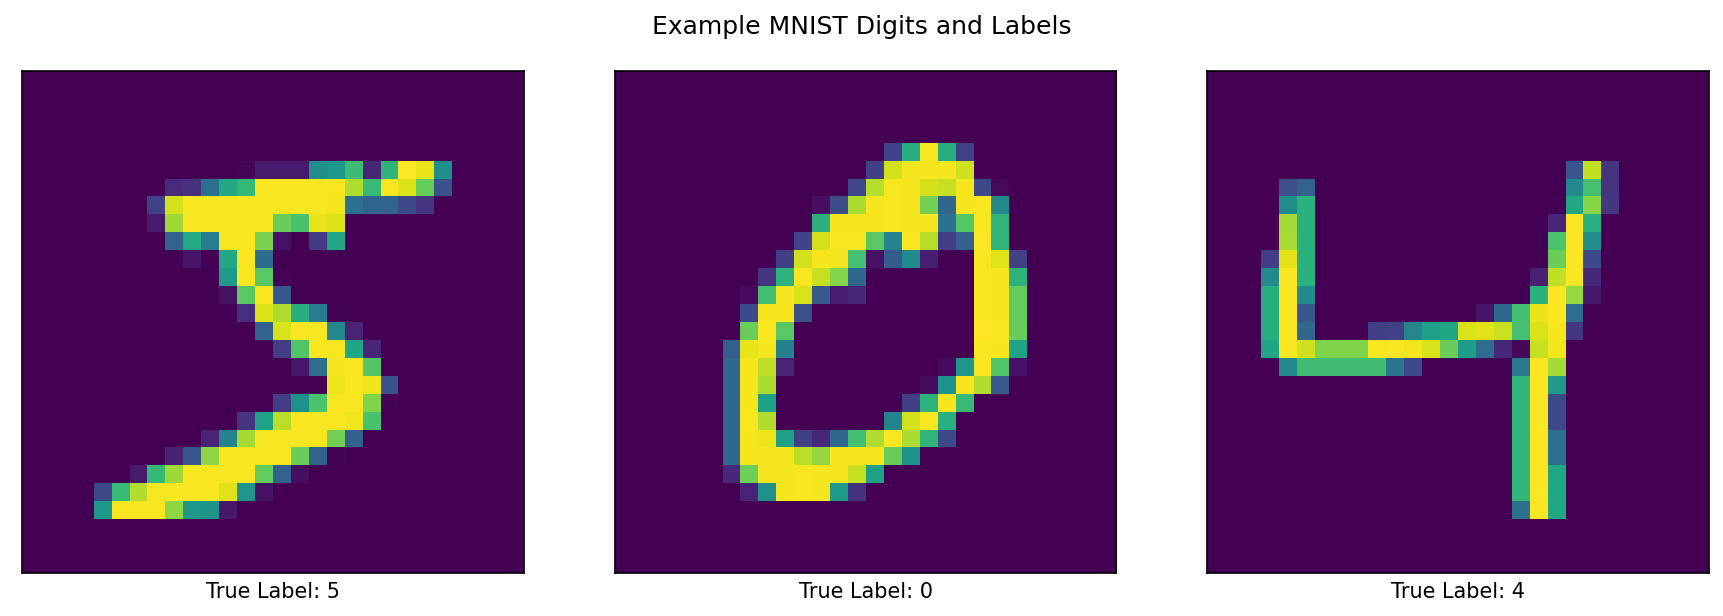

In [5]:
# let's visualize some of our samples
plt.figure(dpi=150, figsize=(12,4))

# go through the first three indexes/datapoints in our set
for i in range(3):
    
    # create our subplot
    plt.subplot(1,3,i+1)
    
    # show our picture
    plt.imshow(X_digits[i].reshape(28,28))
    
    # label our picture
    plt.xlabel(f"True Label: {int(y_digits[i])}")
    
    # hide the ticks
    plt.xticks([])
    plt.yticks([])
    
# beautify
plt.suptitle("Example MNIST Digits and Labels")
plt.tight_layout()
plt.show()

## Loading .pickle datasets

Finally, our last dataset of cancerous or benign breast cell images is stored as a `.pickle` file. The `pickle` package allows us to save virtually any object in Python created from any package for us to use later. We can `pickle` lists, integers, NumPy arrays, classes, functions, specific instances of classes, ... you name it!

This dataset is already pre-divided into train and test sets, so we will load them accordingly. We are working with $0$ and $1$ labels (binary classification): $0$ corresponds to benign cells and $1$ corresponds to cancerous cells.

Special thanks to Professor Michael Brenner (SEAS) for allowing me to use this dataset.

In [6]:
import pickle

# importing our data
with open("breast_cancer_classification/breast_cancer_data.pickle", "rb") as file:
    breast_cancer_data = pickle.load(file)
    
# extract the train and test imgs
Xtrain_bc = breast_cancer_data['train_img']
ytrain_bc = np.array(breast_cancer_data['train_lbl'])

# extract the train and test labels: 0 for benign and 1 for malignant
Xtest_bc = breast_cancer_data['test_img']
ytest_bc = np.array(breast_cancer_data['test_lbl'])

Let's take a look at the shape of our training data. We see that we are working with $46$ training points, each with resolution $768 \times 896$ (high definition!). The $3$ in the last dimension means that we are working with three-channel color images, one for each of red, green, and blue.

In [7]:
# print out the shape of training data
print(Xtrain_bc.shape)

(46, 768, 896, 3)


Let's display a few of these images and their labels. Again we will use the `plt.imshow` function:

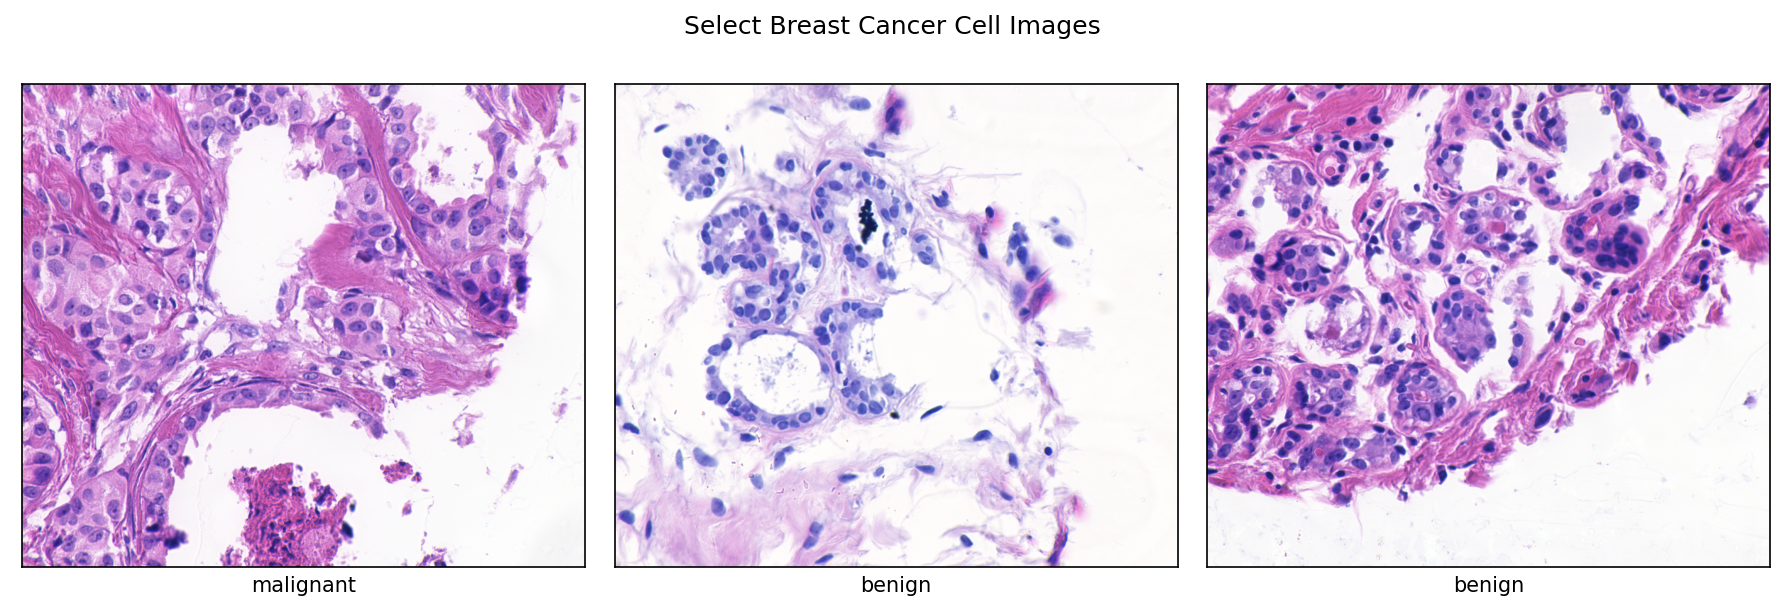

In [8]:
plt.figure(dpi=150, figsize=(12,4))
for i in range(3):
    
    # create our subplot
    plt.subplot(1,3,i+1)
    
    # plot our image
    plt.imshow(Xtrain_bc[i])
    
    # put our word label based on the 0 or 1
    if ytrain_bc[i] == 0:
        plt.xlabel("benign")
    else:
        plt.xlabel("malignant")
        
    # beautify
    plt.xticks([])
    plt.yticks([])
    
# more beautifying
plt.suptitle("Select Breast Cancer Cell Images")
plt.tight_layout()
plt.show()

# Train-Test Split

In most of the HW assignments, for simplicity, we've trained and calculated our model performances on the same exact dataset. As taught in lecture, in reality, we always split our data into train and test data sets. Fortunately, `scikit-learn` has a `train_test_split` features that allows us to shuffle our data and divide it into train and test sets. Let's use `train_test_split` on our diabetes and digits datasets:

In [9]:
from sklearn.model_selection import train_test_split

# divide our data into train/test sets: 'test_size' specifies what proportion of our data to make as the test set
Xtrain_diabetes, Xtest_diabetes, ytrain_diabetes, ytest_diabetes = train_test_split(X_diabetes, y_diabetes, 
                                                                                    test_size=0.2, random_state=0)

# let's repeat the process for our digits data
Xtrain_digits, Xtest_digits, ytrain_digits, ytest_digits = train_test_split(X_digits, y_digits, 
                                                                            test_size=0.2, random_state=0)

As always, let us print out the shapes of our newly-splitted train and test sets for each dataset:

In [10]:
# let's check the shapes of the diabetes dataset splits
print(f"Diabetes Train X Shape: {Xtrain_diabetes.shape}")
print(f"Diabetes Train y Shape: {ytrain_diabetes.shape}")
print(f"Diabetes Test X Shape: {Xtest_diabetes.shape}")
print(f"Diabetes Test y Shape: {ytest_diabetes.shape}")

Diabetes Train X Shape: (353, 10)
Diabetes Train y Shape: (353,)
Diabetes Test X Shape: (89, 10)
Diabetes Test y Shape: (89,)


In [11]:
# let's check the shapes of the MNIST digit splits
print(f"Digits Train X Shape: {Xtrain_digits.shape}")
print(f"Digits Train y Shape: {ytrain_digits.shape}")
print(f"Digits Test X Shape: {Xtest_digits.shape}")
print(f"Digits Test y Shape: {ytest_digits.shape}")

Digits Train X Shape: (4800, 784)
Digits Train y Shape: (4800,)
Digits Test X Shape: (1200, 784)
Digits Test y Shape: (1200,)


# Scikit-learn Model API

Having created train-test splits for all three of our datasets, we can start implementing some of the models that we've learned in class. Many of the traditional models we've encountered (i.e., basically everything except for neural networks) can be found in a package called `scikit-learn`. For more details, please reference the `scikit-learn` documentation [here](https://scikit-learn.org/stable/modules/classes.html).

Let's begin with linear models, or in other words, LinearRegression and its variants, including LASSO and Ridge. The `scikit-learn` package also supports the CV (or "cross-validated") versions of these models. As we learned in class, LASSO and Ridge have a regularization parameter that we have to tune to our particular dataset. The `LassoCV` and `RidgeCV` models allow us to automatically search thousands of possible regularization parameter values to find the best one using cross-validation. 

In general, most supervised (and some unsupervised) `scikit-learn` will have a `.fit()` function and a `.predict()` function. The `scikit-learn` is very elegant in the sense that if you know how to use one model, you basically have a working understanding of how to use all of them. Again, for more detailed specifications and model-specific functions, please see the documentation.

In [12]:
# import these models
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression

# LinearRegression / Lasso / Ridge
model = LassoCV(eps=1e-8, n_alphas=10000, max_iter=500, fit_intercept=True)

# fit our model - sklearn finds the optimal weights
model.fit(Xtrain_diabetes, ytrain_diabetes)

# test our model - make our predictions
lasso_preds = model.predict(Xtest_diabetes)

# calculate our RMSE
lasso_error = np.sqrt(np.mean((lasso_preds - ytest_diabetes) ** 2))
print(lasso_error)

58.6057938329856


We can also access the fitted weights and other parameters. In the case of linear models like Lasso(CV), we can look at the coefficients, intercepts, and more. Note that the variable names that `scikit-learn` uses may be slightly different from what we covered in class, so always, always consult the documentation!

In [13]:
# print out the weights
print(f"weights: {model.coef_}")

# print out the bias term
print(f"bias term: {model.intercept_}")

# for CV estimators: print out the best regulariation parameter
print(f"best alpha: {model.alpha_}")

weights: [ -19.03086342 -224.42463893  567.57103815  286.38384447 -220.0953289
   -0.         -182.50611053   72.69839255  573.03429224   37.20467889]
bias term: 152.41849934480888
best alpha: 0.02114986169413159


The `scikit-learn` also supports logistic regression, including penalized variants. Let's try training a logistic regression model on our breast cancer data.

In [14]:
from sklearn.linear_model import LogisticRegression

# create our LogisticRegression classifier
model = LogisticRegression(penalty='l2', tol=0.0001, max_iter=500)

# SVM requires that each datapoint be a vector, and not a picture / matrix of pixels
Xtrain_bc_flattened = Xtrain_bc.reshape(Xtrain_bc.shape[0], -1)
Xtest_bc_flattened = Xtest_bc.reshape(Xtest_bc.shape[0], -1)

# fit our SVM model
model.fit(Xtrain_bc_flattened, ytrain_bc)

# make our predictions          
lr_preds = model.predict(Xtest_bc_flattened)
          
# calculate + display our accuracy
lr_accuracy = np.mean(ytest_bc == lr_preds)
print(lr_accuracy)

0.8333333333333334


And, of course, `scikit-learn` also has support for SVM max-margin classifiers, under the name `SVC`. Let's experiment with training an SVM. We didn't explicitly cover SVMs in lecture this year, but they are still a very useful family of classifiers that we can play around with.

In [15]:
from sklearn.svm import SVC

# create our SVM classifier
model = SVC(C=2.0, kernel="rbf")

# SVM requires that each datapoint be a vector, and not a picture / matrix of pixels
Xtrain_bc_flattened = Xtrain_bc.reshape(Xtrain_bc.shape[0], -1)
Xtest_bc_flattened = Xtest_bc.reshape(Xtest_bc.shape[0], -1)

# fit our SVM model
model.fit(Xtrain_bc_flattened, ytrain_bc)

# make our predictions          
SVM_preds = model.predict(Xtest_bc_flattened)
          
# calculate + print our accuracy
SVM_accuracy = np.mean(ytest_bc == SVM_preds)
print(SVM_accuracy)

0.6666666666666666


There are also many classifiers and regression methods that are outside the scope of this class that one can find in `scikit-learn`. For the practical assignment, you are highly encouraged to experiment with methods that we have not covered in class!

In [16]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest
model = RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=-1)
model.fit(Xtrain_bc.reshape(Xtrain_bc.shape[0], -1), ytrain_bc)

# make our predictions
rf_preds = model.predict(Xtest_bc.reshape(Xtest_bc.shape[0], -1))
print(np.mean(rf_preds == ytest_bc))

0.75


# Hyperparameter GridSearch using Scikit-learn

As we've seen above, there are many tunable parameters in each of our models. In real-life applications, we have to train and test many models of the same type, each with slightly different hyperparameters. It would be a pain to tune them all individually, but thankfully, `scikit-learn` has a `GridSearchCV` tool that allows us to run a search over many combinations of hyperparameters and select the best combination of hyperparameter values. 

All we have to do is specify the parameters that we want to search over, the values we want to test, and the model of interest. Then, `GridSearchCV` will perform cross-validation over each of our hyperparameter combinations and then return a fitted model on the best hyperparameter combination. Here, "best" is defined as the model that has the lowest mean cross-validated error. Let's try doing a gridsearch over an SVM classifier, with the choice of SVM over some other models just because SVMs are relatively quick to train.

In [17]:
from sklearn.model_selection import GridSearchCV

# these are the settings that we will tune: 'C', 'kernel'
param_grid = {'C' : [0.01, 0.1, 1.0], 
              'kernel' : ['rbf', 'sigmoid'],}

# instantiate our template model
SVM = SVC()

# instantiate our gridsearch estimator - cv=None defaults to the 5-fold cross validation
SVM_CV = GridSearchCV(estimator=SVM, param_grid=param_grid, n_jobs=-1, cv=None, verbose=1)
SVM_CV.fit(Xtrain_bc_flattened, ytrain_bc)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0], 'kernel': ['rbf', 'sigmoid']},
             verbose=1)

In [18]:
# convert our results to a pd.DataFrame
SVM_results = pd.DataFrame(SVM_CV.cv_results_).sort_values(by=['rank_test_score'])
SVM_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,9.182994,0.524200,3.207454,0.598405,1.0,rbf,"{'C': 1.0, 'kernel': 'rbf'}",0.9,0.444444,0.777778,0.777778,0.888889,0.757778,0.165164,1
0,11.986179,0.134863,3.632008,0.095737,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.6,0.555556,0.555556,0.555556,0.666667,0.586667,0.043546,2
1,8.123810,2.237687,1.506374,0.110337,0.01,sigmoid,"{'C': 0.01, 'kernel': 'sigmoid'}",0.6,0.555556,0.555556,0.555556,0.666667,0.586667,0.043546,2
2,8.572459,1.831425,4.016006,0.423852,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.6,0.555556,0.555556,0.555556,0.666667,0.586667,0.043546,2
3,7.890301,0.822720,1.620348,0.125106,0.1,sigmoid,"{'C': 0.1, 'kernel': 'sigmoid'}",0.6,0.555556,0.555556,0.555556,0.666667,0.586667,0.043546,2


In [19]:
# print the best results
print(SVM_CV.best_params_)

{'C': 1.0, 'kernel': 'rbf'}


Once we have our best model and its associated parameters, we can actually directly use it for prediction. But for educational purposes, let's create a new classifier using the best parameters that we found in the previous cells and make some predictions.

In [20]:
# TRAIN YOUR FINAL MODEL USING PARAMETERS FROM GRID SEARCH HERE
best_params = SVM_CV.best_params_

# select our best model from the gridsearch (teechically, you can directly use SVM_CV for predictions, too!)
SVM_best = SVC(C=best_params['C'], kernel=best_params['kernel'])

# fit it on our entire train data
SVM_best.fit(Xtrain_bc_flattened, ytrain_bc)

# make our predictions + calculate our metrics
y_preds = SVM_best.predict(Xtest_bc_flattened)

With our predictions, let's proceed to the next section for a more thorough discussion on the performance metrics that `scikit-learn` helps us use:

# Metrics: Accuracy, Per-Class Accuracy, and Confusion Matrix

In addition to mean train or test accuracy, there are many other metrics that we can use to evaluate how well our model is performing. Some of these metrics include balanced accuracy (which takes the relative sizes of each class into consideration), the ROC-AUC (Receiver Operating Characteristic) curve, the full `classification_report` feature in `scikit-learn`, and confusion matrices. 

The ROC-AUC curve plots the true positive rate and false positive rate as a function of different classification thresholds (which we usually set to $0.5$). The confusion matrices help us discern class-specific biases / behavior in our model.

For additional metrics, please see [here](https://scikit-learn.org/stable/modules/model_evaluation.html) for reference.

In [21]:
# here are some metrics imports
from sklearn.metrics import accuracy_score # for mean accuracy
from sklearn.metrics import balanced_accuracy_score # takes into account class sizes

# ROC-AUC
from sklearn.metrics import RocCurveDisplay

# for the full classification report
from sklearn.metrics import classification_report

# quick confusion matrices
from sklearn.metrics import confusion_matrix

In [22]:
# accuracy + balanced accuracy
print("Mean Accuracy: ", round(accuracy_score(ytest_bc, y_preds), 3))
print("Balanced Accuracy: ", round(balanced_accuracy_score(ytest_bc, y_preds), 3))

Mean Accuracy:  0.75
Balanced Accuracy:  0.757


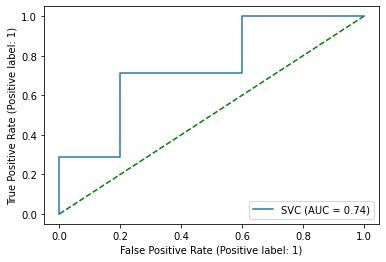

In [23]:
# ROC-AUC - specify the model, X data, and y data. yes, svm has a probabilistic component!
svc_disp = RocCurveDisplay.from_estimator(SVM_best, Xtest_bc_flattened, ytest_bc)
plt.plot(np.linspace(0, 1.0, 30), np.linspace(0, 1.0, 30), 'g--')
plt.show()

In [24]:
# generate our classification report: precision, recall, f1, etc.
target_names = ['benign', 'malignant']
print(classification_report(ytest_bc, y_preds, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.67      0.80      0.73         5
   malignant       0.83      0.71      0.77         7

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



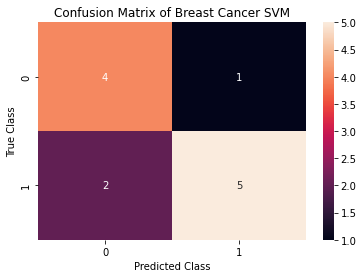

In [25]:
# confusion matrix: 0=benign, 1=malignant
cfm = confusion_matrix(ytest_bc, y_preds)

# we can plot our confusion matrices, and toggle the values to appear
sns.heatmap(cfm, annot=True)
plt.title("Confusion Matrix of Breast Cancer SVM")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Saving and Loading Models using Pickle

As we saw earlier, some models and gridsearches may take quite a bit of time to train. We would hope to not have to retrain our models each time we open our notebook. Our good friend the `pickle` package can be of assistance here: we can simply save our trained models as `.pickle` files.

In [26]:
# tell python to create a new file for writing ('wb')
with open("best_SVM.pickle", "wb") as file:
    
    # write the file
    pickle.dump(SVM_best, file)

In [27]:
# let's load our file so we can use it quickly, without having to gridsearch + train again
with open('best_SVM.pickle', "rb") as file:
    
    # store our loaded model in a variable
    SVM_best = pickle.load(file)

With `SVM_best` loaded, let's take a look at the parameters to verify everything worked out:

In [28]:
print(f"Kernel: {SVM_best.kernel}")
print(f"Regularization C: {SVM_best.C}")

Kernel: rbf
Regularization C: 1.0


# Dimension Reduction and Combining Dimension Reduction with Models (OPTIONAL FOR PRACTICAL I)

Soon, we will start covering dimensionality reduction techniques like PCA, short for "principal component analysis." You will not be required to use PCA on Practical I, but I thought I should still include this section just for completeness. Feel free to skip this section for now.

In a future HW, you will be implementing PCA from scratch. However, in practice, `scikit-learn` has a `PCA` model already implemented for you! Let's try fitting PCA on our MNIST digits and our breast cancer images.

## On MNIST

For visualization purposes, let's only calculate the first two principal components on MNIST.

In [29]:
from sklearn.decomposition import PCA

# create our PCA object that will calculate the first two components.
pca = PCA(n_components=2)

# fit our PCA to the training data, and transform our data into its 2-dimensional representation
Xtrain_digits_pca = pca.fit_transform(Xtrain_digits)

# let's check the shape of our lower dim representation
print(f"Lower-Dim PCA Representation Train Data Shape: {Xtrain_digits_pca.shape}")

Lower-Dim PCA Representation Train Data Shape: (4800, 2)


We can also visualize the first two components' coordinates for each data point, and this is decent heuristic of how well certain classifiers can potentially perform on our data. Do you notice that some classes are clustered a lot closer together than others? Which classes have more overlap?

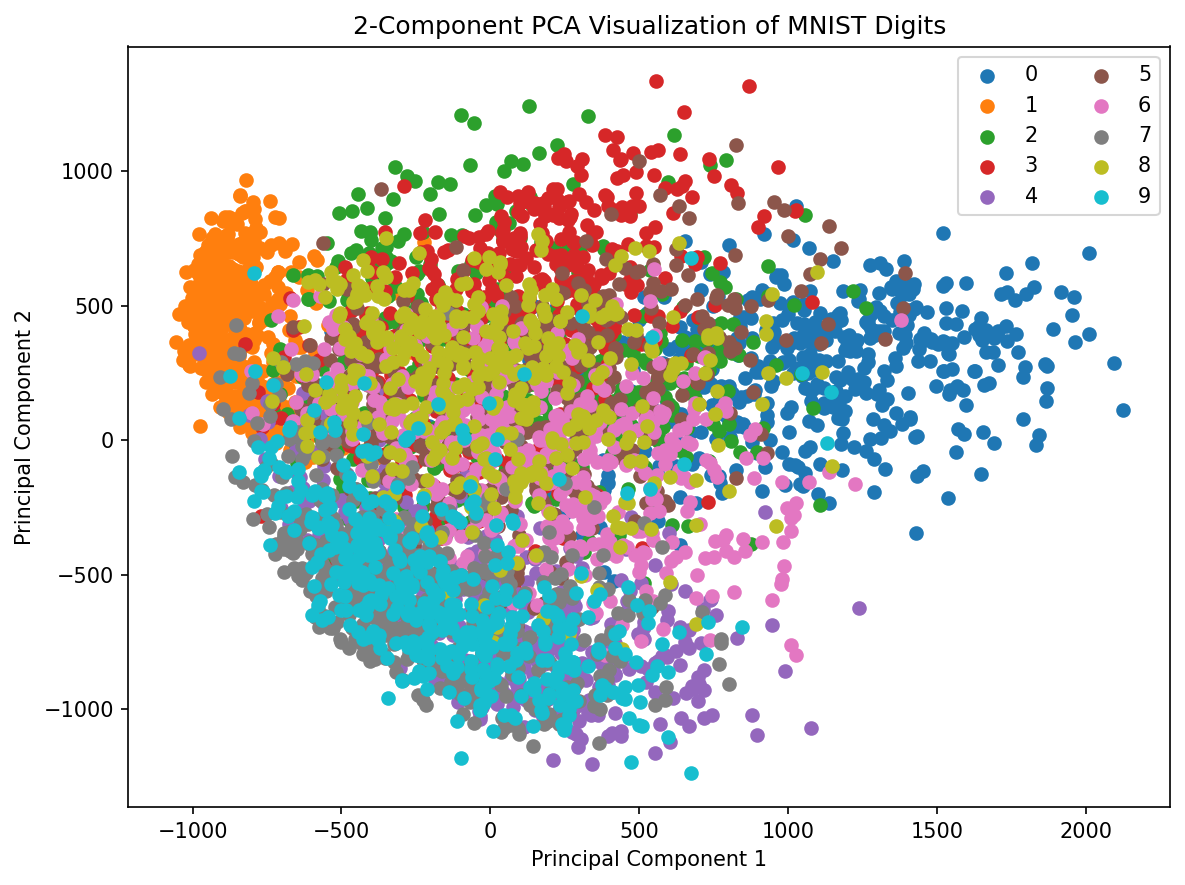

In [30]:
# scatter plot the two components just to see if the data is separable by eye
plt.figure(dpi=150, figsize=(8,6))

# iterate through all the digits
for digit in range(10):
    
    # get the samples that correspond to this digit
    samples = Xtrain_digits_pca[ytrain_digits == digit]
    
    # scatter plot the first two PCA component
    plt.scatter(samples[:,0], samples[:,1], label=str(digit))

# beautify
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="upper right", ncol=2)
plt.title("2-Component PCA Visualization of MNIST Digits")
plt.tight_layout()
plt.show()

## On Breast Cancer Samples

Let's also try computing PCA with 2 principal components on our breast cancer image dataset.

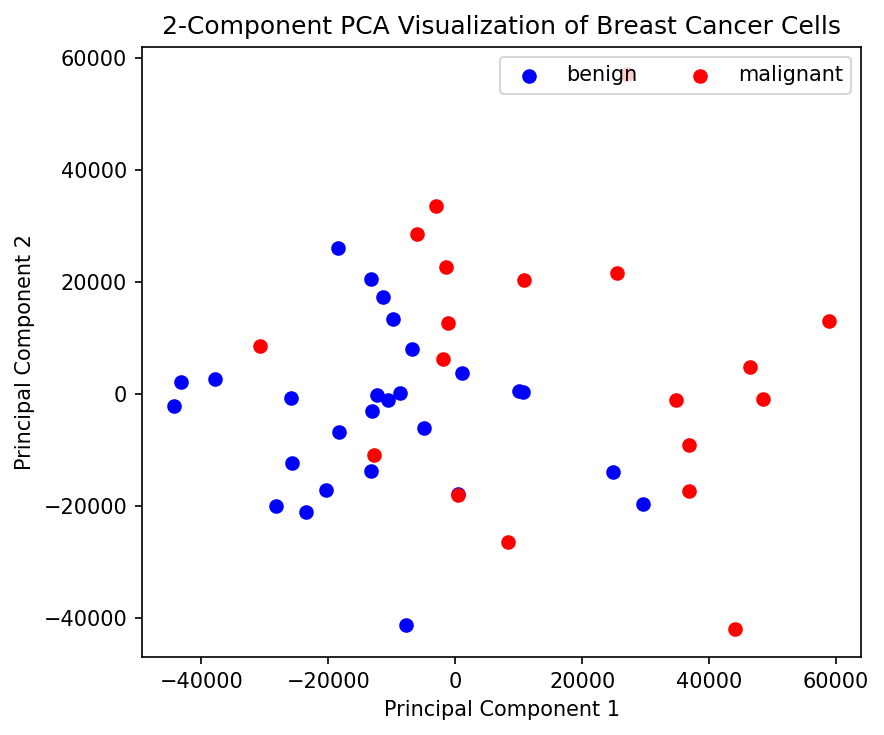

In [31]:
# create our PCA object that will calculate the first two components.
pca = PCA(n_components=2)

# fit our PCA to the training data, and transform our data into its 2-dimensional representation
Xtrain_bc_pca = pca.fit_transform(Xtrain_bc_flattened)

# scatter plot the two components just to see if the data is separable by eye
plt.figure(dpi=150, figsize=(6,5))

# get the benign cells + scatterplot first two components
benign_samples = Xtrain_bc_pca[ytrain_bc == 0]
plt.scatter(benign_samples[:,0], benign_samples[:,1], label="benign", color="blue")

# get the malignant cells + scatterplot first two components
malignant_samples = Xtrain_bc_pca[ytrain_bc == 1]
plt.scatter(malignant_samples[:,0], malignant_samples[:,1], label="malignant", color="red")

# beautify
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="upper right", ncol=2)
plt.title("2-Component PCA Visualization of Breast Cancer Cells")
plt.tight_layout()
plt.show()

PCA can also be used in conjunction with supervised learning! As we saw earlier, our breast cancer data is comprised of extremely high-resolution images, which means that we are working with very large matrices. At scale, working with such high-resolution images may be incredibly slow and computationally expensive. What if first performed PCA on our breast cancer images, and then used something like logistic regression for classification?

As we will soon cover in class, PCA dimension reduction also allows us to potentially weed out some noise from our data and only return the actually relevant features. Let's give it a shot:

In [32]:
# create our PCA object that will calculate the first 10 principal components
pca = PCA(n_components=10)

# fit + transform our training data
Xtrain_bc_lowdim = pca.fit_transform(Xtrain_bc_flattened)

# train a logistic regression on the PCA transformed training data
lr_pca = LogisticRegression()
lr_pca.fit(Xtrain_bc_lowdim, ytrain_bc)

# transform our testing data (DO NOT FIT AGAIN!)
Xtest_bc_lowdim = pca.transform(Xtest_bc_flattened)

# make our test predictions
preds_lowdim = lr_pca.predict(Xtest_bc_lowdim)

# check our accuracy
print(f"Accuracy: {np.mean(preds_lowdim == ytest_bc)}")

Accuracy: 0.6666666666666666


# Quick Neural Networks in PyTorch

And now, we reach the penultimate section of this document, which is on training deep-learning neural networks. But first, let's start with some imports.For those of you with older computers, it is highly, highly recommended that you train neural networks in Google Colab, which has GPU support -- more on that in a minute.

In [33]:
# overall PyTorch
import torch

# just so I don't have to type torch.nn each time
import torch.nn as nn

# gets us access to optimizers like SGD, Adam, RMSprop, etc.
import torch.optim as optim

Neural networks, as a class of models, make very, very extensive use of matrix multiplication operations. GPUs (yes, the stuff you use to play *Battlefield* and *Call of Duty* with) are designed to be able to perform matrix multiplication operations a lot faster than CPUs. Odds are that your laptop does not have a supported Nvidia GPU, but fortunately, Google Colab does have free GPU runtime support!

If you use Google Colab, you may find that training neural networks with a GPU may be orders of magnitude faster than with just your laptop's CPU. The below code just tells PyTorch to use a CUDA-supported GPU if it can find one on our system, and to use CPU otherwise.

A note to folks using M1/M2-powered MacBooks (November 2020+): as of last summer (around June 2022), both PyTorch and TensorFlow (another common deep-learning package) have built-in support for Apple Silicon GPUs. However, in practice, even Apple's M2 Pro GPUs are still quite a bit slower than dedicated Nvidia GPUs.

Fun fact: PyTorch is developed by Facebook / Meta, while TensorFlow is developed by Google / Alphabet.

In [34]:
# setting our device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

We can very quickly create a neural network in PyTorch using the `nn.Sequential()` tool. Let's create a simple toy network for use on the MNIST digits dataset. All we have to input is a sequence of layers that we want PyTorch to feed a data point through. For example, in the below network, we have one hidden linear layer of $40$ nodes, and an output layer of $10$ nodes (one for each of our ten classes). In between, we have a ReLU activation function. 

This is literally it. Note that I *did not* add a softmax function at the end of my model. This was intentional. When we start making predictions / calculating losses, PyTorch's `nn.CrossEntropyLoss()` automatically applies softmax for us, so it would be actually incorrect to do it now. 

The "sequential" part of `nn.Sequential()` just means that we are exclusively building a feed-forward network. Inputs can only be passed forward through the network. More on that later.

In [35]:
# create a model
model = nn.Sequential(
    nn.Linear(in_features=784, out_features=40),
    nn.ReLU(),
    nn.Linear(in_features=40, out_features=10),
)

Of course, our model isn't trained yet, so all of the weights are still at their initial randomized states. Yes, PyTorch automatically initiates weights when we define a model using `nn.Sequential()`. Let's just try making some predictions so that we can see in more detail how PyTorch actually computes and outputs predictions.

The `with torch.no_grad()` in the first line below tells PyTorch to not keep track of any of gradients while we are running our code inside the wrapper. This is important because when we are testing / evaluating our model (as opposed to training), we do not want our model to keep learning. This also saves computational power.

In [36]:
# tell pytorch to not track gradients
with torch.no_grad():
    
    # convert our input data to a float tensor
    inputs = torch.tensor(Xtest_digits).float()
    
    # make our predictions -- all we have to do is pass in our input data.
    preds = model(inputs)
    
    # let's just print out the shape of our preds
    print(f"Shape of preds: {preds.shape}")
    
    # let's take a look at one of our preds: these are non-softmaxed outputs!
    print(f"One pred vector: {preds[0]}")
    
    '''
    Let's figure out which integer class we are predicting.
    1. Note that softmax converts vectors into probabilities: e^{z_i} / sum{e^{z_i}}
    2. However, if we only care about the integer class, that's the same thing as finding the class/index with the highest non-softmaxed value
    3. Think about the behavior of the softmax function!
    '''
    
    # ... thus we can just take the argmax of each row, corresponding to axis/dim=1
    preds = preds.argmax(1)
    
    # these are the integer preds, where 8 corresponds to class 8, etc.!
    print(f"test predictions: {preds}")
    
    # let's check our accuracy before training anything
    print(f"test accuracy: {torch.sum(preds == torch.tensor(ytest_digits)) / ytest_digits.shape[0]}")

Shape of preds: torch.Size([1200, 10])
One pred vector: tensor([-21.1195, -20.2115,  20.2862,   0.3006,   9.6508,  -3.7324,   0.0276,
          2.8223,  -8.7955,  23.4283])
test predictions: tensor([9, 9, 1,  ..., 9, 4, 5])
test accuracy: 0.09833333641290665


Having defined my simple model, now let's start training it. In the below cell, we move our model to either CPU or GPU (as specified earlier), define a loss function, and set an optimizer. In lecture, we learned about gradient descent, but there are actually many other gradient-based optimizers like `Adam` and `RMSprop` that perform a lot better in certain situations than vanilla gradient descent. I like using `Adam`.

In [37]:
# moving the model to right device
model.to(device)

# specify our loss function - CrossEntropyLoss. DO NOT INPUT PROBABILITIES!
loss_func = nn.CrossEntropyLoss()

# define our optimizer - could also do Adam, RMSprop, SGD, and tell it to keep track of our model's parameters.
# the lr is for learning rate, and weight_decay is a regularization parameter.
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

Now, we train our simple neural network. I'll let the comments in my code do the talking, instead of writing full paragraph descriptions. One thing to note that is that our MNIST digits dataset is pretty small, so I did not use a DataSet object. In practice, if we are dealing with tens of thousands of datapoints, we might want to use a DataSet object to divide our data into small batches to feed into the network so that we don't overload our memory and crash our system. For simplicity, I'll ignore that for today:

In [38]:
# metrics we want to collect
train_accuracy_list = []
train_loss_list = []
test_accuracy_list = []
test_loss_list = []


# train for a given number of epochs
for epoch in tqdm(range(20), desc="Epoch"):
        
    # get our input imgs and labels. We have to convert from NumPy (original) to torch.tensors()
    # PyTorch expects inputs as floats, and labels as longs (i.e., high-memory integers)
    inputs = torch.tensor(Xtrain_digits).float()
    labels = torch.tensor(ytrain_digits).long()
    
    # move our inputs and labels to the right device.
    inputs, labels = inputs.to(device), labels.to(device)

    # reset the gradient (we don't want to have any residual gradients from previous training epochs)
    optimizer.zero_grad()
    
    # compute our NON-SOFTMAXED outputs using the current weights: this is our forward-prop
    outputs = model(inputs) # implicitly calls the .forward() function -- more on that later
    
    # calculate the cross-entropy loss (note that this automatically applies softmax!)
    loss = loss_func(outputs, labels) # calculate the loss
    
    # calculate the gradients of our loss with respect to all relevant parameters: this is back-prop
    loss.backward() # calculate the gradient
    
    # make a small step update to our parameters
    optimizer.step() 
    
    # ---- everything below this line is just to collect some analytics/metrics

    # update our train_loss
    train_loss_list.append(loss.item()) # .item() extracts the pure Python number, with no gradient implications.

    # calculate + record our train + test accuracy. We're in evaluation mode now and NOT training!
    with torch.no_grad():

        # get our predictions with the current weights: torch.max returns (values, indices). I just want indices.
        # you could also just use argmax(dim=1)
        _, predicted = torch.max(outputs.data, 1)
        
        # get our train accuracy: number of matched labels / total number of labels
        train_accuracy = torch.sum(predicted == labels) / labels.size(0)
        
        # add to our list
        train_accuracy_list.append(train_accuracy)
            
        # get our test inputs and labels. same process as earlier
        test_inputs = torch.tensor(Xtest_digits).float()
        test_labels = torch.tensor(ytest_digits).long()

        # move to the right device
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)

        # run our test set inputs through the network
        test_outputs = model(test_inputs)

        # get our test_loss
        test_loss = loss_func(test_outputs, test_labels)

        # record our test_loss
        test_loss_list.append(test_loss.item())

        # make our predictions based on max.
        _, test_predicted = torch.max(test_outputs.data, 1)

        # get our train accuracy
        test_accuracy = torch.sum(test_predicted == test_labels) / test_labels.size(0)
        
        # add to our list
        test_accuracy_list.append(test_accuracy)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Let's plot our train and test accuracies and losses over time. There's not much technical code here, just `matplotlib.pyplot`.

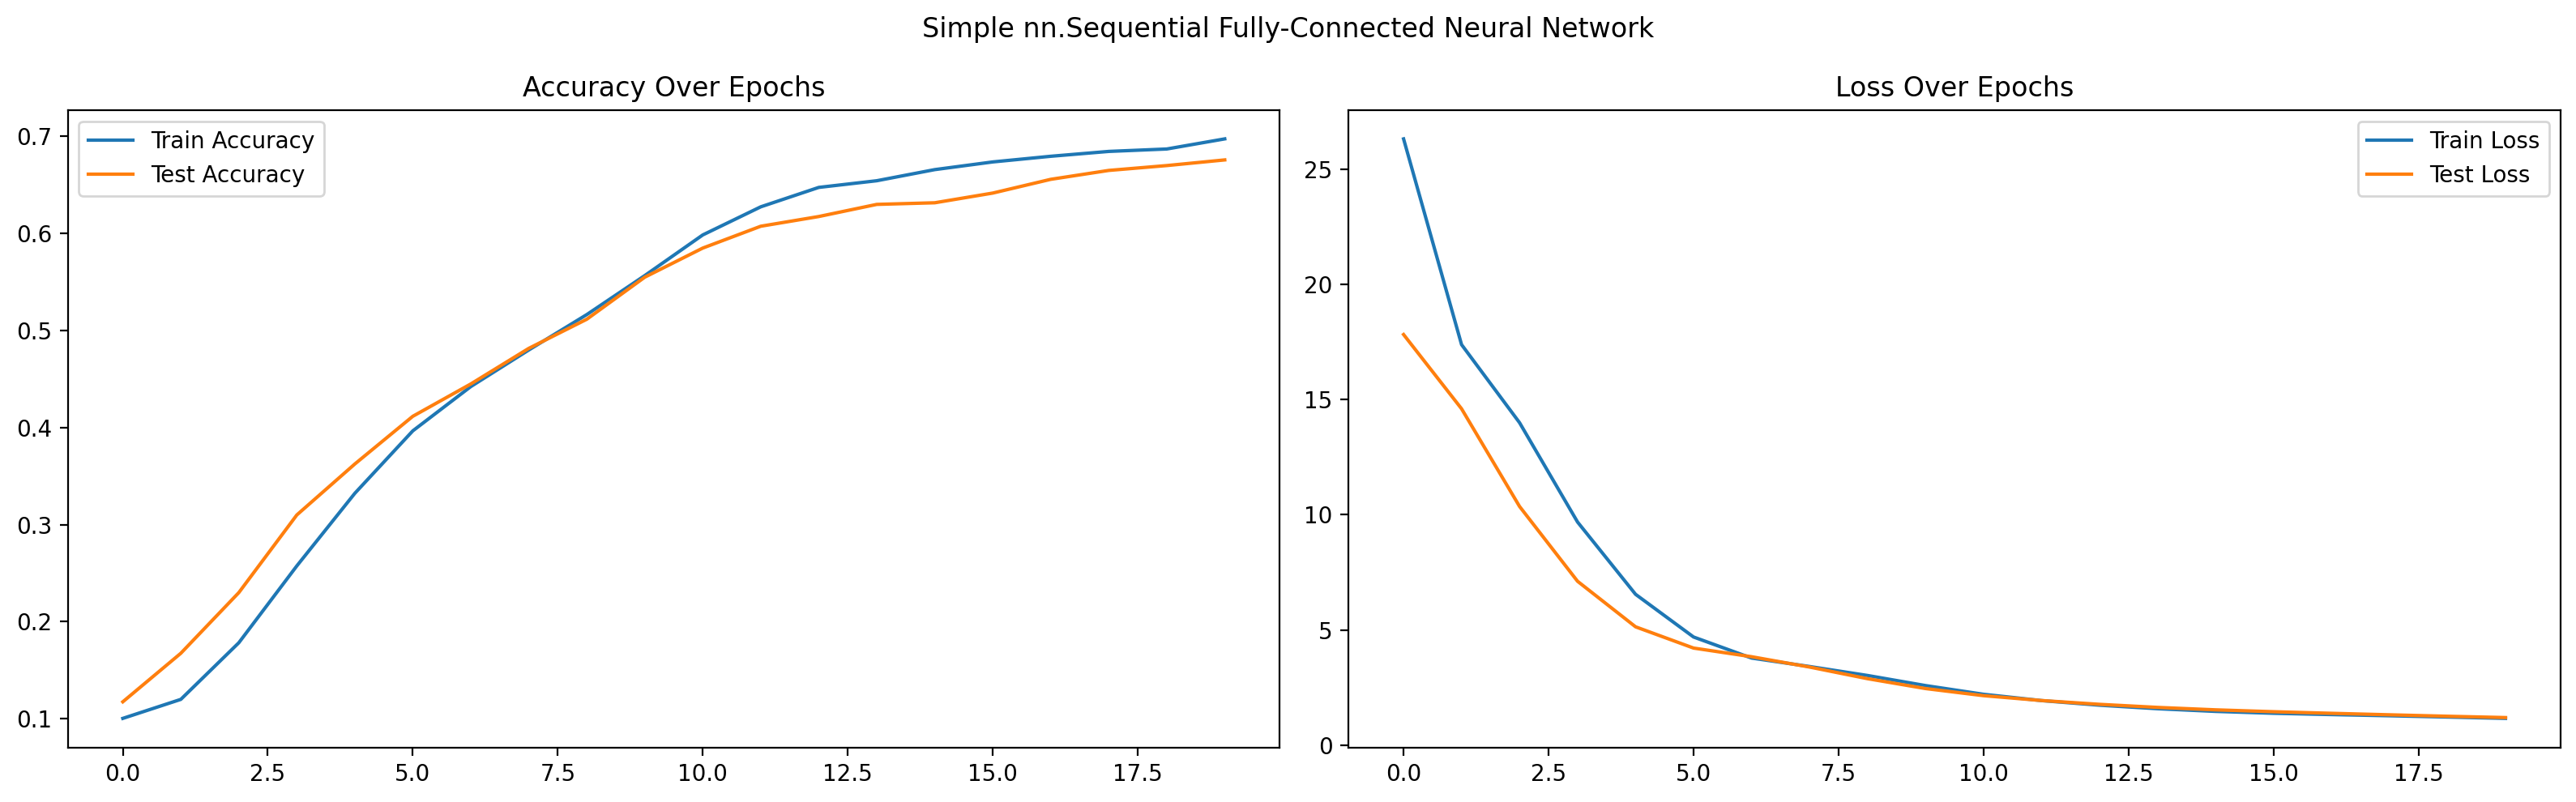

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5), dpi=200)

ax[0].plot(train_accuracy_list, label="Train Accuracy")
ax[0].plot(test_accuracy_list, label="Test Accuracy")
ax[0].set_title("Accuracy Over Epochs")
ax[0].legend()

ax[1].plot(train_loss_list, label="Train Loss")
ax[1].plot(test_loss_list, label="Test Loss")
ax[1].set_title("Loss Over Epochs")
ax[1].legend()

plt.suptitle("Simple nn.Sequential Fully-Connected Neural Network")
plt.tight_layout()
plt.show()

# Custom Neural Networks in PyTorch

The `nn.Sequential` module is helpful for building quick networks, but sometimes we might want to be able to customize our network a bit more. What we can do is to create a custom class that inherits PyTorch's `nn.Module` class, so that we still have access to a lot of core neural network functions. For this last section, let's try building a convolutional neural network (CNN). Stanford's [CS231](https://cs231n.github.io/convolutional-networks/) has a very nice explanation on CNNs.

This is not a course on deep-learning, so I will omit excessive technical details on CNNs, but the main building block for CNNs is the convolutional layer, which is found in PyTorch as ``nn.Conv2d()`` ([documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)).

One quirk with PyTorch's `nn.Conv2d()` layer is that it expects image datasets to be of the form $(N, C, W, H)$, where $N$ is the number of data points, $C$ is the number of color channels (in our case, $1$ because MNIST digits are in greyscale), $W$ is the width in pixels of each image, and $H$ is the height in pixels of each image. Our current data is in the form $(N, W, H, C)$. We have to reshape our train and test image data:

In [40]:
# the "_nn" suffix just tells us that we are ready to feed our convolutional neural network!
Xtrain_digits_nn = Xtrain_digits.reshape(-1, 1, 28, 28)
Xtest_digits_nn = Xtest_digits.reshape(-1, 1, 28, 28)

Now, let us start making our neural network. For clarity, I will reimport the packages so we know what packages we are using.

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim

In [42]:
# setting our device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

The below code shows how we can create a `CNN` class by inheriting the ``nn.Module`` class. In essence, any neural network in PyTorch is defined by just two main functions. First, the ``__init__`` constructor function defines + initializes the layers (and nonlinearities) of our network and any other supporting parameters. Second, the ``forward`` function tells PyTorch what to do with any input data that we try to pass through our network.

We do not have to manually initialize the possibly-millions of weights or specify how to update them. Everything is already implemented through the inherited ``nn.Module`` class.

In [43]:
# inherits the nn.Module class
class CNN(nn.Module):
    
    # constructor
    def __init__(self):
        
        # call the parent constructor (for nn.Module)
        super().__init__()
        
        # define the layers: do NOT include the nonlinearities yet!
        
        ## first set of convolution + pooling: see documentation about specifics
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)
        
        ## to increase robustness ... again, this is optional reading
        self.pool1 = nn.MaxPool2d(2)
        
        # second set of convolution + pooling
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2)
        
        # dropout layer to randomly drop neurons: for regularization
        self.dropout = nn.Dropout()
        
        ## end with three linear layers, this is general practice
        self.fc1 = nn.Linear(800, 500)
        self.fc2 = nn.Linear(500, 100)
        self.fc3 = nn.Linear(100, 10)
    
    # define how the neural network processes ONE data point (which generalizes instantly into a whole dataset)
    # aka: given x, how do we get the output? Just pass it through the layers.
    def forward(self, x):
        
        # first set of convolution + pooling
        x = self.conv1(x)
        x = self.pool1(x)
        x = torch.relu(x)
        
        # second set of convolution + pooling
        x = self.conv2(x)
        x = self.pool2(x)
        x = torch.relu(x)
        
        # the drop out layer
        x = self.dropout(x)
        
        # flatten + linear layers
        x = torch.flatten(x, start_dim=1)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        
        return x

The below code looks virtually identical to our earlier `nn.Sequential` neural network. We instantiate our model, move it to the right device, define a loss function, and tell PyTorch which parameters to update.

In [44]:
# instantiate our model
model_cnn = CNN()

# moving the model to right device
model_cnn.to(device)

# specify our loss function
loss_func = nn.CrossEntropyLoss()

# define our optimizer - could also do Adam, RMSprop, SGD
optimizer = optim.Adam(model_cnn.parameters(), lr=1e-3, weight_decay=1e-5)

This training loop is almost directly copy-pasted from my earlier training loop.

In [45]:
# metrics we want to collect
train_accuracy_list = []
train_loss_list = []
test_accuracy_list = []
test_loss_list = []


# train for a given number of epochs
for epoch in tqdm(range(20), desc="Epoch"):
        
    # query data for inputs (images) + labels: [inputs, labels]
    inputs = torch.tensor(Xtrain_digits_nn).float()
    labels = torch.tensor(ytrain_digits).long()
    
    # move to the right device.
    inputs, labels = inputs.to(device), labels.to(device)

    # reset the gradient
    optimizer.zero_grad()

    # forward prop, backward prop, make incremental step
    outputs = model_cnn(inputs) # implicitly calls the .forward() function
    loss = loss_func(outputs, labels) # calculate the loss
    loss.backward() # calculate the gradient
    optimizer.step() # take our incremental update of the parameters

    # update our train_loss
    train_loss_list.append(loss.item()) # extracts the pure Python number, with no gradient implications.

    # calculate + record our train + test accuracy (TRAINING!)
    with torch.no_grad():

        # get our predictions with the current weights: torch.max returns values, indices
        _, predicted = torch.max(outputs.data, 1)
        
        # get our train accuracy
        train_accuracy = torch.sum(predicted == labels) / labels.size(0)
        
        # add to our list
        train_accuracy_list.append(train_accuracy)
            
        # get our test inputs and labels
        test_inputs = torch.tensor(Xtest_digits_nn).float()
        test_labels = torch.tensor(ytest_digits).long()

        # move to the right device
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)

        # run our test set inputs through the network
        test_outputs = model_cnn(test_inputs)

        # get our test_loss
        test_loss = loss_func(test_outputs, test_labels)

        # record our test_loss
        test_loss_list.append(test_loss.item())

        # make our predictions based on max.
        _, test_predicted = torch.max(test_outputs.data, 1)

        # get our train accuracy
        test_accuracy = torch.sum(test_predicted == test_labels) / test_labels.size(0)
        
        # add to our list
        test_accuracy_list.append(test_accuracy)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

The plotting code below is the same as well.

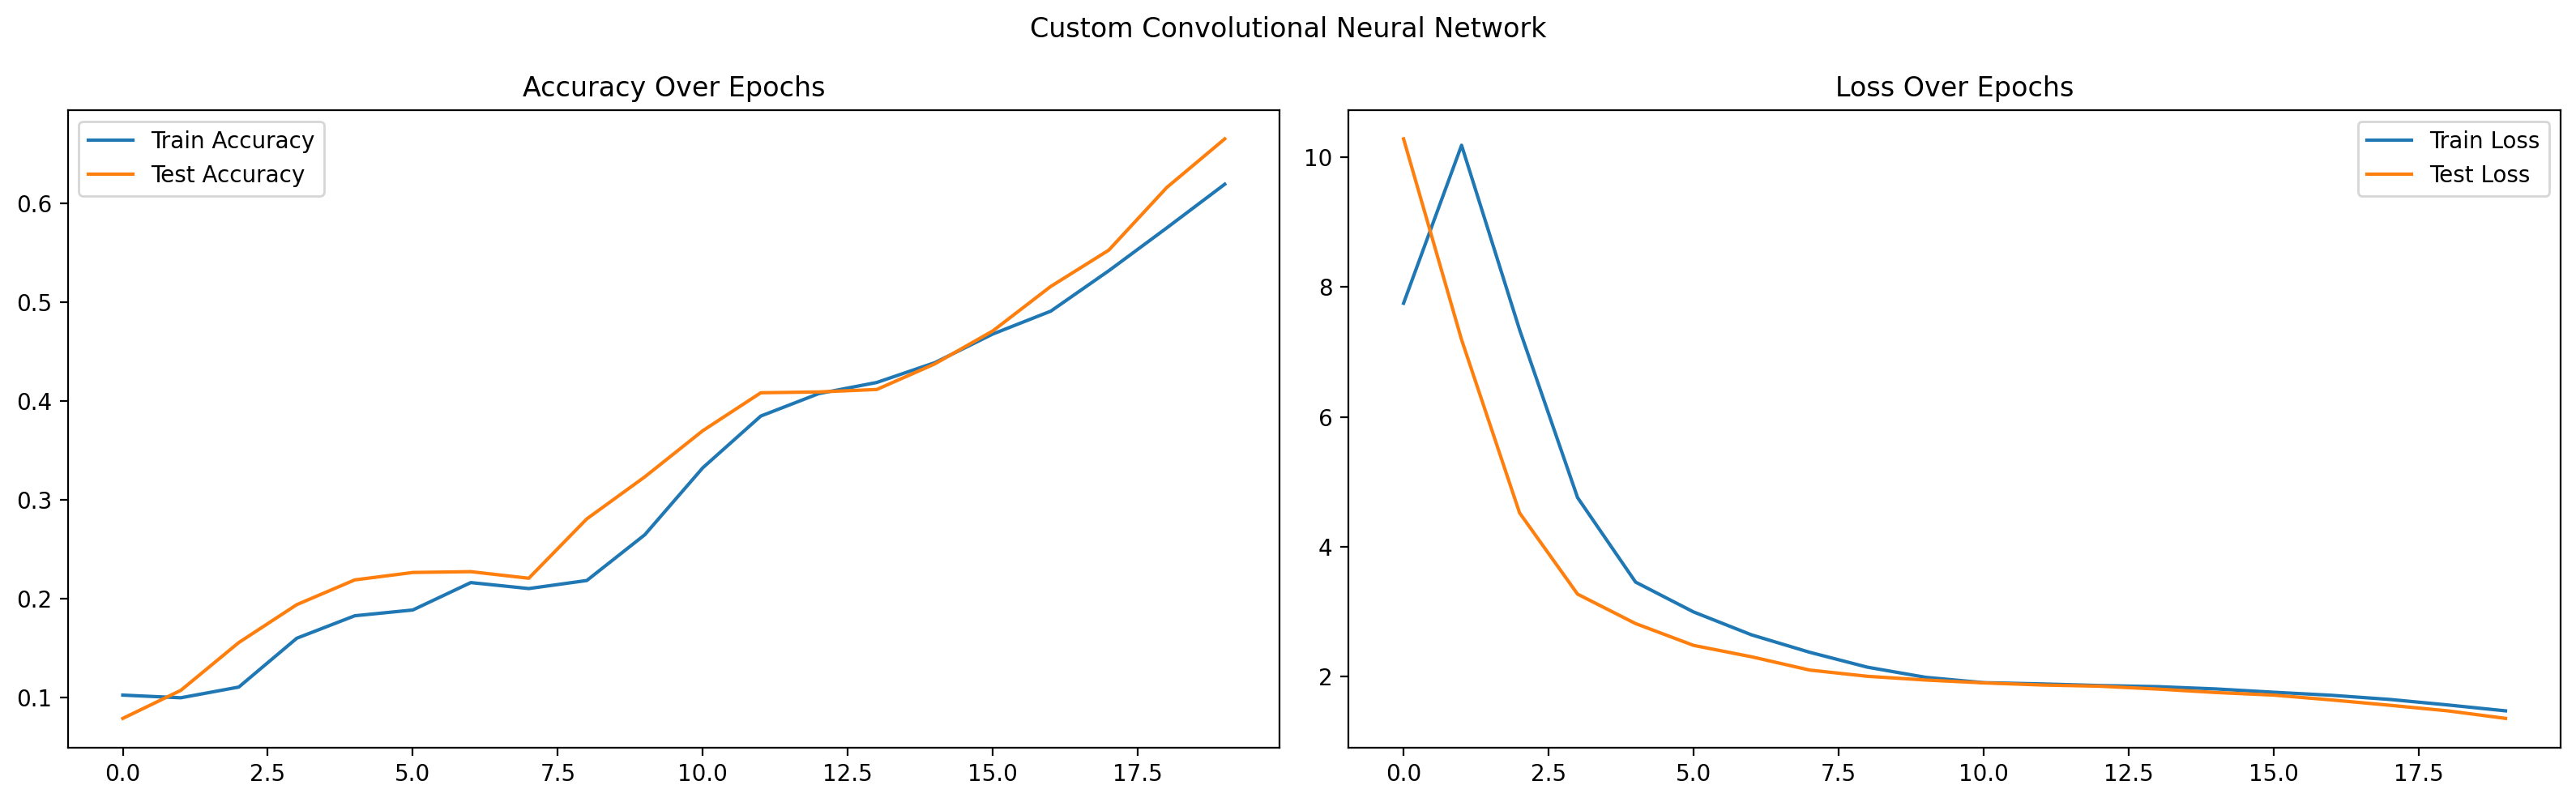

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5), dpi=200)

ax[0].plot(train_accuracy_list, label="Train Accuracy")
ax[0].plot(test_accuracy_list, label="Test Accuracy")
ax[0].set_title("Accuracy Over Epochs")
ax[0].legend()

ax[1].plot(train_loss_list, label="Train Loss")
ax[1].plot(test_loss_list, label="Test Loss")
ax[1].set_title("Loss Over Epochs")
ax[1].legend()

plt.suptitle("Custom Convolutional Neural Network")
plt.tight_layout()
plt.show()

Just to review, let's try making some test predictions using our CNN and display the confusion matrix. Yes, PyTorch and `scikit-learn` can work with each other! You may have to convert everything into NumPy arrays, though!

In [47]:
# make our test predictions with NO GRADIENT!
with torch.no_grad():
    
    # set our model to evaluation mode
    model_cnn.eval()
    
    # get our test inputs and labels
    test_inputs = torch.tensor(Xtest_digits_nn).float()
    test_labels = torch.tensor(ytest_digits).long()
    
    # make our predictions and get the integer classes using argmax this time
    ypreds_test = model_cnn(test_inputs).argmax(dim=1)
    
    # convert our predictions into numpy
    ypreds_test = ypreds_test.detach().numpy()
    
# calculate our test accuracy
print(f"Accuracy: {np.mean(ypreds_test == ytest_digits)}")

Accuracy: 0.73


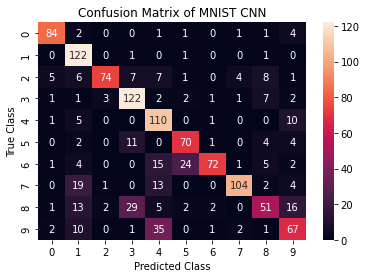

In [48]:
# compute + display our confusion matrix
plt.figure()
cfm = confusion_matrix(ytest_digits, ypreds_test)
sns.heatmap(cfm, annot=True, fmt='g')
plt.title("Confusion Matrix of MNIST CNN")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Final Remarks

I hope you found this guide helpful and that you are now more confident to take on Practical I. As always, you are more than welcome to reach out to the course staff on Ed for any lingering questions or concerns. You can also reach me via email at skylerwu@college.harvard.edu if you have any specific questions on what we covered in this guide.

Best of luck everyone!